## PCS5024 - Aprendizado Estatístico
 - Primeiro trimestre 2023 
 - Profs. Anna Helena Realli Costa e Fábio Gagliardi Cozman 
 - Aluno: Caio Azevedo - caio.aze@alumni.usp.br
 - Entrega em: 30.03.23

## Trabalho 1 - Descrição
A entregar até 31/3 via edisciplinas: uma folha apenas (frente e verso) em formato pdf, contendo descrição concisa relativa às seguintes atividades:

1) Obtenha a base Adult (por exemplo no UCI Repository or no Kaggle).

Recomendação: leia sobre o UCI Repository e o Kaggle, são recursos importantes.

2) Analise os atributos, dados faltantes, e características gerais da base Adult, usando ferramentas da sklearn. Selecione atributos, discretize atributos numéricos, processe dados faltantes. Se possível use Jupyter para desenvolver seu trabalho.

3) Construa um classificador para a variável ">50k" da base Adult (ou seja, se a pessoa ganha mais do que US$50k por ano ou não). Use um classificador Nearest Neighbour com seleção de hiperparâmetro via validação cruzada; se preferir, divida a base de treino em duas partes respectivamente para treino e validação. 

5) Apresente acurácia, precisão e revocação do melhor classificador Nearest Neighbour obtido.

6) Ponto extra: teste um classificador Naive Bayes para a mesma variável com os mesmos atributos.

## Objetivo
 - Análise para classificação das pessoas que ganham mais de U$50k por ano. 
 - **Projeto Classificação Binária**

## Sobre o dataset

### Características descritivas
| Data Set Characteristics | Number of Instances | Attribute Characteristics | Number of Attributes | Associated Tasks | Missing Values? 
| --- | --- | --- | --- | --- | --- 
| Multivariate | 48842 | Categorical, Integer | 14 | Classification | Yes 

### Sobre os atributos

- **income** (target): <=50K, >50K

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: continuous.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - -  - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Referências:
 
 - https://archive.ics.uci.edu/ml/datasets/adult
 - https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
 - http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html
 - http://www.cs.toronto.edu/~delve/data/adult/desc.html
 - https://www.scaler.com/topics/data-science/categorical-missing-values/ 
 
 
 - https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/
 - https://medium.com/analytics-vidhya/handle-missing-values-in-categorical-features-b7c5b073dda2
 - https://www.scaler.com/topics/data-science/categorical-missing-values/
 - https://github.com/itdxer/adult-dataset-analysis/blob/master/Data%20analysis.ipynb
 - https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/
 - https://medium.com/analytics-vidhya/adult-census-income-dataset-using-multiple-machine-learning-models-f289c960005d
 - https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php
 
   **Sobre correlação ponto bisserial**
 - https://towardsdatascience.com/point-biserial-correlation-with-python-f7cd591bd3b1
 - https://www.statisticshowto.com/point-biserial-correlation/
 
 
  **Sobre correlação atributos categóricos**
 - https://www.scribbr.com/statistics/chi-square-tests/
 - https://www.statisticshowto.com/probability-and-statistics/chi-square/


 boas implementações
 - https://www.kaggle.com/code/bhupendrarajput/complete-eda-and-machine-learning
 - https://www.kaggle.com/uciml/adult-census-income
 - https://arxiv.org/ftp/arxiv/papers/1810/1810.10076.pdf
 - https://github.com/itdxer/adult-dataset-analysis
 - https://github.com/itdxer/adult-dataset-analysis/blob/master/Data%20analysis.ipynb
 - https://github.com/itdxer/adult-dataset-analysis/blob/master/Classification.ipynb

## Implementação EDA (exploratory data analysis)

### Importação bibliotecas

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import heapq
import scipy.stats as stats

In [2]:
from pandas_profiling import ProfileReport

In [3]:
%matplotlib inline
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [4]:
%%javascript
//evita scroll dos gráficos
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Constantes

In [5]:
#'https://raw.githubusercontent.com/Bhupendra1770/Adult-Census-Income-Prediction/main/adult.csv'
APP_PATH = os.getcwd()
DATA_DIR = os.path.join(APP_PATH, 'data')
TRAIN_DATA_FILE = os.path.join(DATA_DIR, 'adult.data.csv')
TEST_DATA_FILE = os.path.join(DATA_DIR, 'adult.test.csv')
target_column = "income"

### Análise inicial da amostra

 **Considerações do autor**: 
 - *Os arquivos obtidos da url de referência foram divididos em adult.data, contendo* **32.561** *registros e o arquivo adult.test com 16.281 registros, um total de* **48.842** *registros.* 
 - _Para esse estudo, mudei o formato dos arquivos para csv e incluir os nomes das colunas manualmente, conforme descrição do dataset e mantive os arquivos originais na pasta 'data'._ 
 - _Sendo assim, o arquivo adult.data.csv, será utilizado para o treinamento e validação das técnicas de classificação, enquanto que o arquivo adult.test.csv, será utilizada para testar seus respectivos desempenhos._
 
PS: essa primeira análise foi feita por inspeção visual, considerando estatísticas e distribuições dos dados

In [6]:
def read_dataset(path):
    data = pd.read_csv(
        path,
        index_col=None,
        comment='|', 
    )
    #remove eventuais espaços vazios no inicio e/ou fim das colunas do tipo string 'object'
    for i in data.columns:
        if data[i].dtype=='object':
            data[i] = data[i].str.strip()

    #data = data.drop('fnlwgt', axis=1)
    return data

In [7]:
train_data = read_dataset(TRAIN_DATA_FILE)
train_data.head(5)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [8]:
test_data = read_dataset(TEST_DATA_FILE)
test_data.head()

age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18          ?  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country  income  
0              40  United-States  <=50K.  
1              50  United-States  <=50K.  
2              40  United-States   >50K.  
3              40  United-States   >50K.  
4              30  United-States  <=50K.

_Observa-se uma inconsistência na variável target, income, da base de testes por conta da existencia de um ponto no final.
Será necessário remove-lo durante o processamento dos dados._

In [9]:
print("Número de linhas e colunas dos dados de treino: {}".format(train_data.shape))
print("Número de linhas e colunas dos dados de : {}".format(test_data.shape))
print("Total de {} registros em análise".format(train_data.shape[0] + test_data.shape[0]))

Número de linhas e colunas dos dados de treino: (32561, 15)
Número de linhas e colunas dos dados de : (16281, 15)
Total de 48842 registros em análise


_Cada dataset possue 14 colunas preditoras. O total de registros da amostra condiz com o especificação do arquivo "Dataset Description.odt"._

**Visão geral dos dados disponíveis. Os dataset de treino e teste foram agrupados para identificação de eventuais inconsistências.**

In [10]:
data = pd.concat([test_data, train_data])
data.describe(include='all')

age workclass        fnlwgt education  education-num  \
count   48842.000000     48842  4.884200e+04     48842   48842.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     33906           NaN     15784            NaN   
mean       38.643585       NaN  1.896641e+05       NaN      10.078089   
std        13.710510       NaN  1.056040e+05       NaN       2.570973   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.175505e+05       NaN       9.000000   
50%        37.000000       NaN  1.781445e+05       NaN      10.000000   
75%        48.000000       NaN  2.376420e+05       NaN      12.000000   
max        90.000000       NaN  1.490400e+06       NaN      16.000000   

            marital-status      occupation relationship   race    sex  \
count                48842           48842        48842  48842  48842   
unique                   7              15            6      5      2   
top     Married-civ-spouse  Prof-specialty      Husband  White   Male   
freq                 22379            6172        19716  41762  32650   
mean                   NaN             NaN          NaN    NaN    NaN   
std                    NaN             NaN          NaN    NaN    NaN   
min                    NaN             NaN          NaN    NaN    NaN   
25%                    NaN             NaN          NaN    NaN    NaN   
50%                    NaN             NaN          NaN    NaN    NaN   
75%                    NaN             NaN          NaN    NaN    NaN   
max                    NaN             NaN          NaN    NaN    NaN   

        capital-gain  capital-loss  hours-per-week native-country income  
count   48842.000000  48842.000000    48842.000000          48842  48842  
unique           NaN           NaN             NaN             42      4  
top              NaN           NaN             NaN  United-States  <=50K  
freq             NaN           NaN             NaN          43832  24720  
mean     1079.067626     87.502314       40.422382            NaN    NaN  
std      7452.019058    403.004552       12.391444            NaN    NaN  
min         0.000000      0.000000        1.000000            NaN    NaN  
25%         0.000000      0.000000       40.000000            NaN    NaN  
50%         0.000000      0.000000       40.000000            NaN    NaN  
75%         0.000000      0.000000       45.000000            NaN    NaN  
max     99999.000000   4356.000000       99.000000            NaN    NaN

In [11]:
profile = ProfileReport(data, title="Análise exploratória das features do dataset")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Pontos de atenção da análise

**Caracter '.' no final do valor do atributo target income**

In [12]:
test_data.income.value_counts(dropna=False)

<=50K.    12435
>50K.      3846
Name: income, dtype: int64

In [13]:
train_data.income.value_counts(dropna=False)

<=50K    24720
>50K      7841
Name: income, dtype: int64

_**Esse ponto adicional deverá ser removido nos procedimentos de tratamento dos atributos.**_

**Ocorrência recorrente do caracter ?**
 - Observando os valores possíveis das variáveis categóricas, identificou-se a existência do caracter ?, que remete aos valores não preenchidos. Na análise abaixo identificamos em quais atributos preditores eles estão e suas respectivas quantidades.

In [14]:
(data == '?').sum(axis=0)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

_**Esses caracteres serão substituidos por NaN.**_

**Preenchimento suspeito com 9s**
- Dois atributos preditores 'capital-gain' e 'hours-per-week' possuem no o valor máximo cheios de 9s. Isso é pelo menos suspeito, visto que é comum as pessoas usarem desse artifício para preencherem campos numéricos com valores desconhecidos, especialmente quando na interface com o usuário, o campo é do tipo obrigatório.

In [15]:
data['capital-gain'].value_counts(dropna=False).head(10)

0        44807
15024      513
7688       410
7298       364
99999      244
3103       152
5178       146
5013       117
4386       108
8614        82
Name: capital-gain, dtype: int64

In [16]:
heapq.nlargest(10, data['capital-gain'].unique())

[99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051, 18481, 15831]

- _Para o atributo capital-gain, percebe-se uma grande quantidade de ocorrências do valor zero, mas nem tantas assim com o valor 99999, o que implica que provavelmente esses valores remetem ao valor NaN. Sendo assim, esses valores, 99999,  serão substituidos por NaN e devidamente tratados quando da preparação dos dados para classificação._

In [17]:
heapq.nlargest(10, data['hours-per-week'].unique())

[99, 98, 97, 96, 95, 94, 92, 91, 90, 89]

In [18]:
hours_per_week_counts = data['hours-per-week'].value_counts()
largest_hours_per_week = heapq.nlargest(10, data['hours-per-week'].unique())
hours_per_week_counts[hours_per_week_counts.index.isin(largest_hours_per_week)]

99    137
90     42
98     14
96      9
91      3
89      3
92      3
97      2
95      2
94      1
Name: hours-per-week, dtype: int64

 - No caso do atributo 'hours-per-week' percebe-se que existem alguns valores únicos próximos a 99. Aqui percebe-se que a quantidade de '99' é muito superior aos demais valores. É possível também que esse 99, signifique a ocorrência de valores maior que 99, isto é, pessoas que trabalhem mais que 99 horas por semana. Nesse caso, manteremos os valores originais.

**Registros duplicados**

In [19]:
n_samples_before = train_data.shape[0]
n_samples_after = train_data.drop_duplicates().shape[0]

print(n_samples_before)
print(n_samples_after)
print("Registros removidos: {:.2%}".format((n_samples_before - n_samples_after) / n_samples_before))

32561
32537
Registros removidos: 0.07%


_Após remover o atributo 'final weight' por irrelevancia para classificação, (vide comentário abaixo) foram identificados 10.64% de registros duplicados na base de treino. Esses registros devem ser removidos para continuidade da análise e principalmente no treino dos métodos de classificação para evitar vieses._

**Análise de correlação das variáveis continuas com o atributo alvo (target)**

Para indentificação de possíveis atributos preditores irrevelantes para análise, foi utilizado o método de **correlação ponto bisserial**.

In [20]:
for colname, column_series in data._get_numeric_data().iteritems():
    pbc = stats.pointbiserialr((data[target_column] == '>50K').astype(int),data[colname])
    print(colname,': correlation=',pbc[0], 'p-value=',pbc[1])

age : correlation= 0.17881839779812725 p-value= 0.0
fnlwgt : correlation= -0.006870590980384573 p-value= 0.12891479866824257
education-num : correlation= 0.26085463207078774 p-value= 0.0
capital-gain : correlation= 0.1717721757462268 p-value= 4.913e-320
capital-loss : correlation= 0.11665095452905389 p-value= 1.5338525116218399e-147
hours-per-week : correlation= 0.17824517758442493 p-value= 0.0


- _Pelo resultado acima, percebe-se que o atributo ‘fnlwgt’ pouco contribui para análise, visto que sua correlação é negativa e próxima de zero, divergindo dos demaiss atributos._

### Conclusões preliminares
 - Observou-se que não temos atributos preenchidos com null (NaN), no entanto, dados desconhecidos/faltantes estão preenchidos com o caracter '?'
 - Para facilitar o tratamento dos dados, por conta dos métodos de tratamento de nulls, substitui o caracter '?' por nulo/NaN.
 - Quando da análise das amostras agrupadas, percebe-se que temos quatro valores possíveis para variável target, quando na verdade deveriam ser apenas dois. Observando as amostras isoladamente, vemos que os valores 'adicionais' estão na amostra de testes.
 - Os atributos **‘education.num’** e **‘education’** são reduntantes, visto que o primeiro é a representação ordinal do segundo, e por tanto, deverá ser **removido** também.
 - O atributo **‘capital-gain’**, terá o valor 99999, substituido por NaN e tratados para classificação.
 - O **‘fnlwgt’**, que remete ao peso final dos registros analisados, não possui relação com a variável target e por isso será removido. Além disso, quando da sua remoção identifica-se pouco mais de 10% de registros duplicados e que também devem ser removido para implementação da classificação.

## Tratamento e reanálise dos dados

- Daqui em diante aplicam-se medidas de limpeza dos dados, tendo em vista o que foi analisando anteriormente. Em seguida são realizadas mais análises estatísticas nos dados tais como distribuição e correlações em busca de um melhor entendimento.
- Essas análises serão feitas na amostra de treinamento somente, mas posteriormente aplicadas a amostra de testes

In [21]:
def clean_dataset(data):

    #remove eventuais espaços vazios no inicio e/ou fim das colunas do tipo string 'object'
    for i in data.columns:
        if data[i].dtype=='object':
            data[i] = data[i].str.strip()

    # Por algum motivo o dataset de teste tem um ponto (.) no final do atributo target, sendo necessário remove-lo
    data[target_column] = data.income.str.rstrip('.')
    
    # Remoção das colunas colunas abaixo, pois entendemos que elas não são 
    # relevantes para classificação.
    data = data.drop('fnlwgt', axis=1)
    data = data.drop('education-num', axis=1)
    
    # Registros duplicados podem gerar viés na analise e classificação, 
    # logo devem ser removidos
    data = data.drop_duplicates()

    return data

def read_dataset(path):
    return pd.read_csv(
        path,
        index_col=None,
        comment='|',  
        skipinitialspace=True,  
        na_values={
            'capital-gain': 99999,
            'workclass': '?',
            'native-country': '?',
            'occupation': '?',
        },
    )

train_data = clean_dataset(read_dataset(TRAIN_DATA_FILE))
test_data = clean_dataset(read_dataset(TEST_DATA_FILE))

data = train_data

<AxesSubplot:>

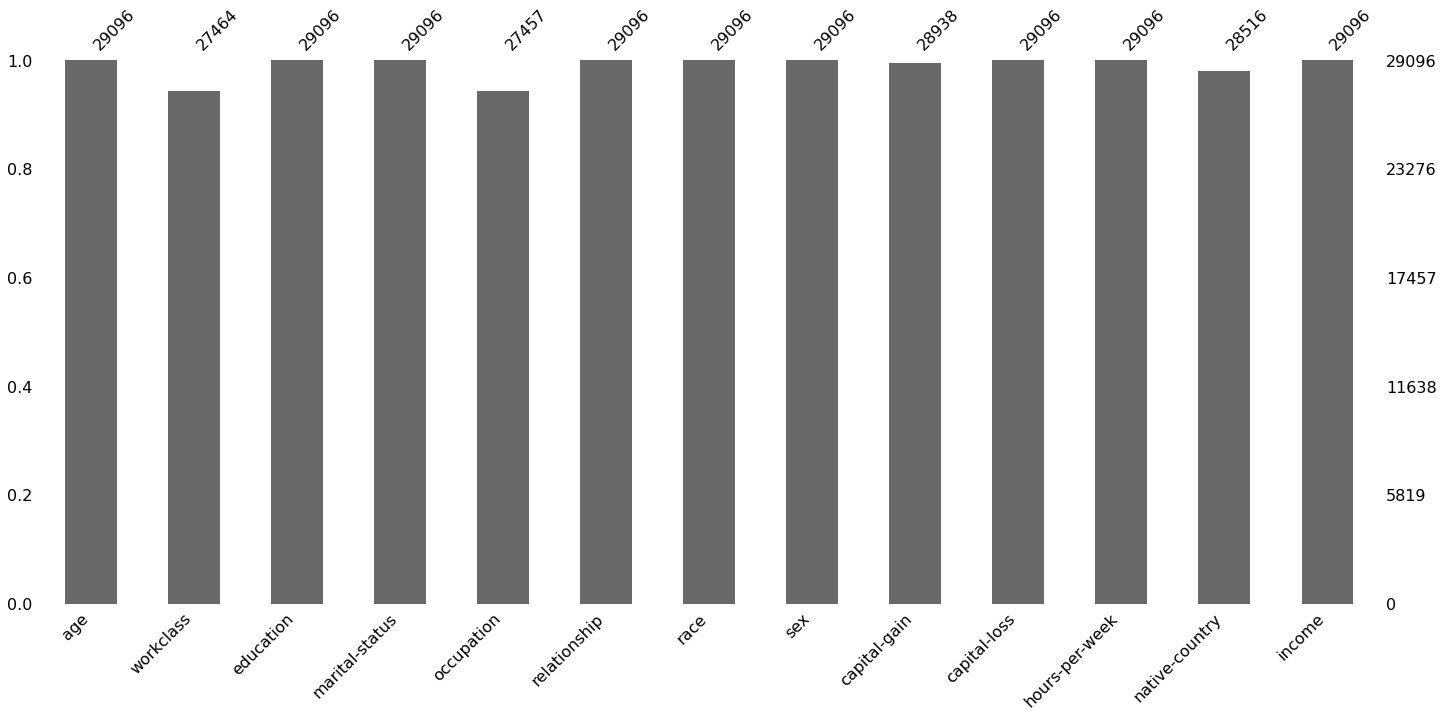

In [22]:
#visualiza a quantidade de registros nulos por atributo, agora que não temos mais '?'
msno.bar(data)

In [23]:
profile = ProfileReport(data, title="Análise exploratória das features do dataset")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Análise dos dados categóricos

In [24]:
# Armazena os atributos categóricos dentre os atributos preditores
cat_col=[]
for i in data.columns:
    if data[i].dtype=='object':
        cat_col.append(i)

#### Frequencia

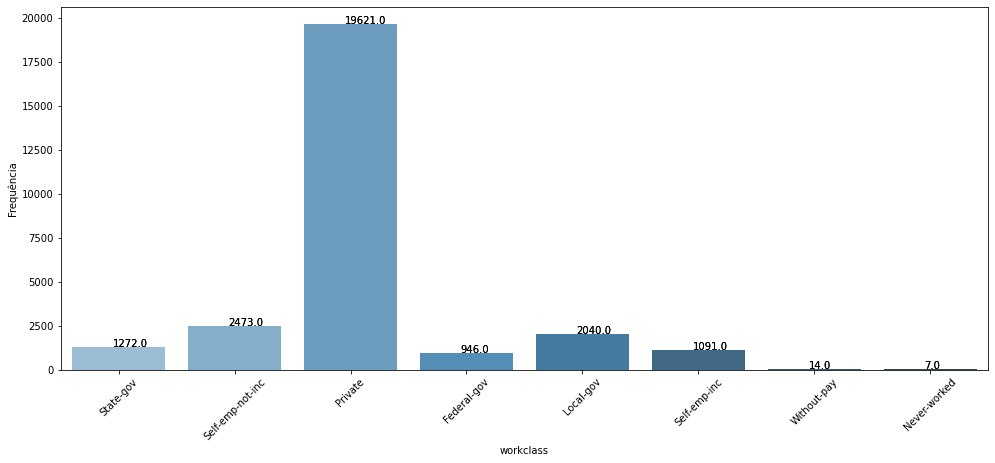

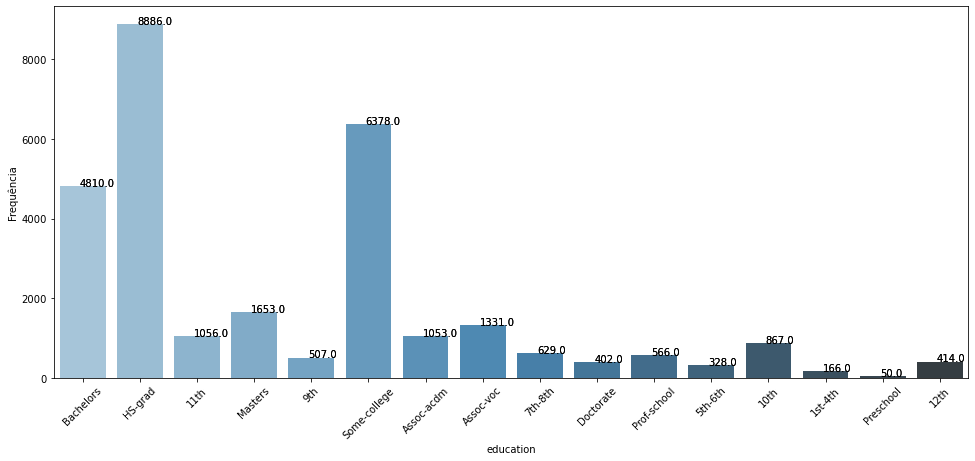

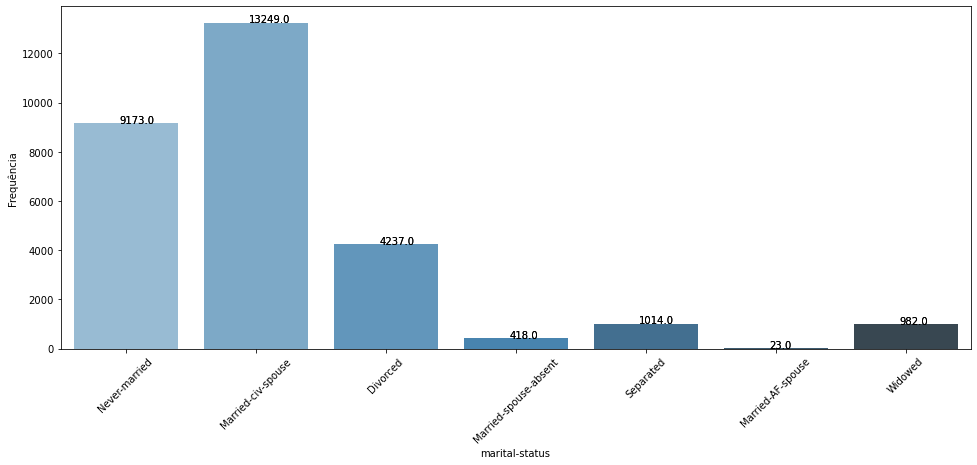

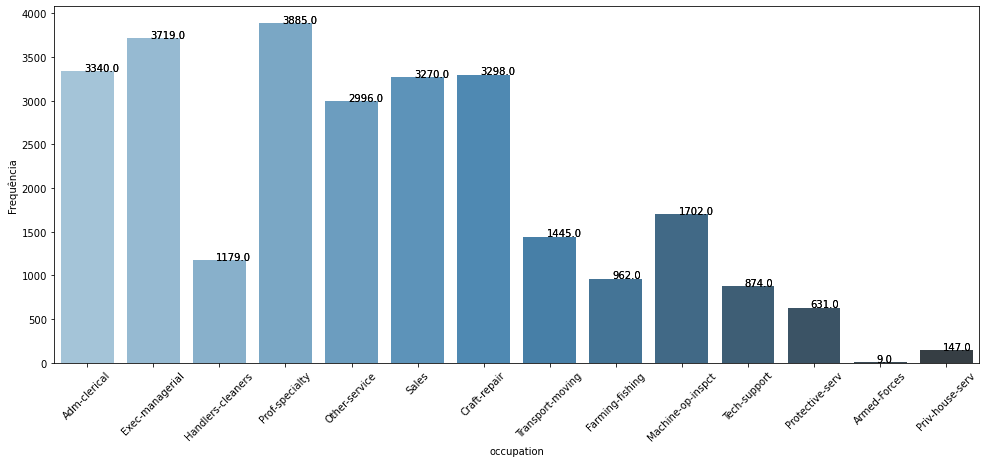

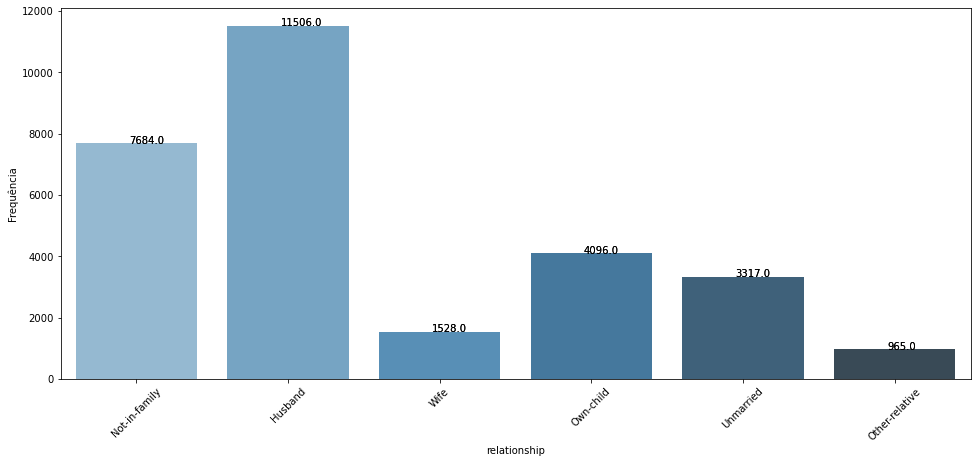

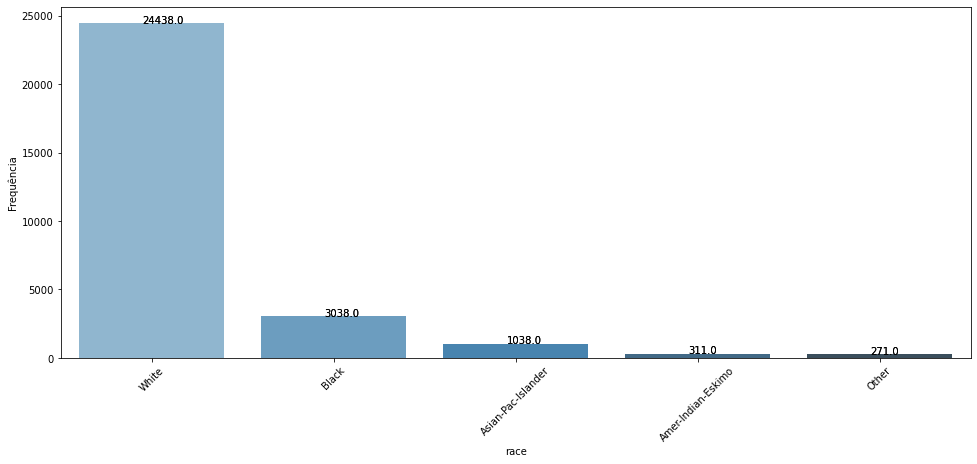

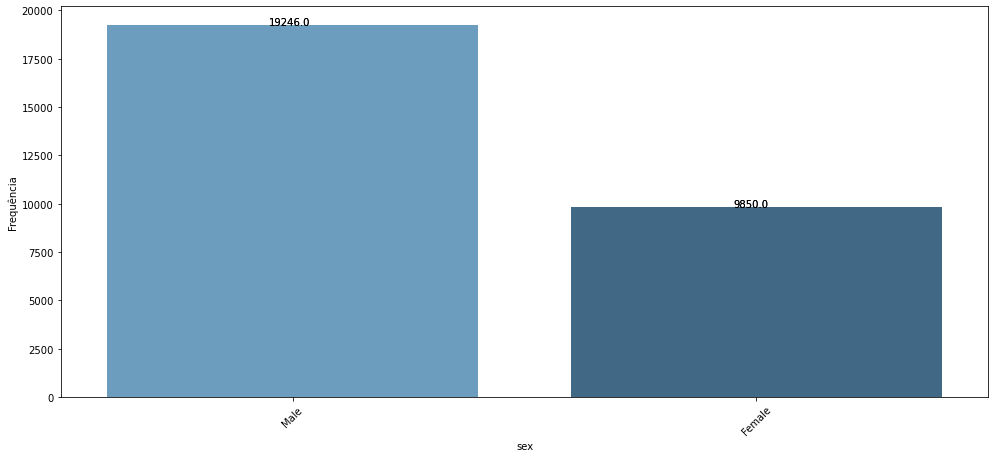

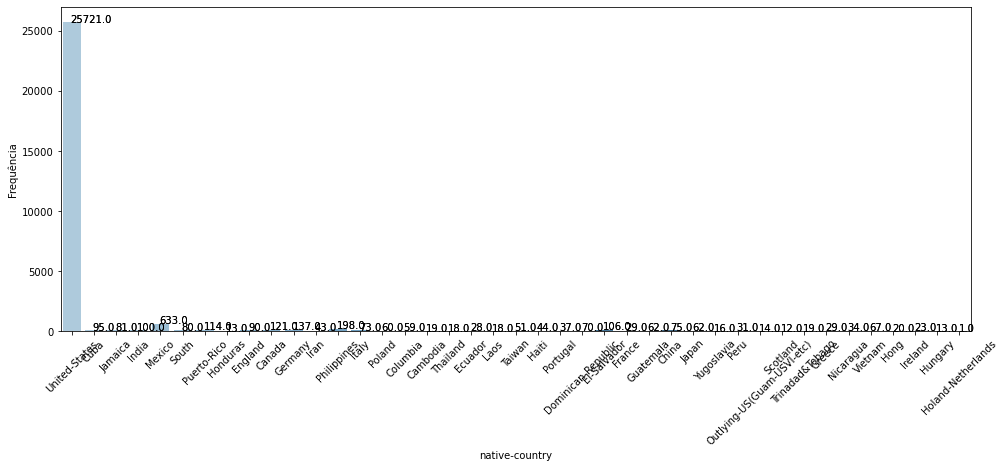

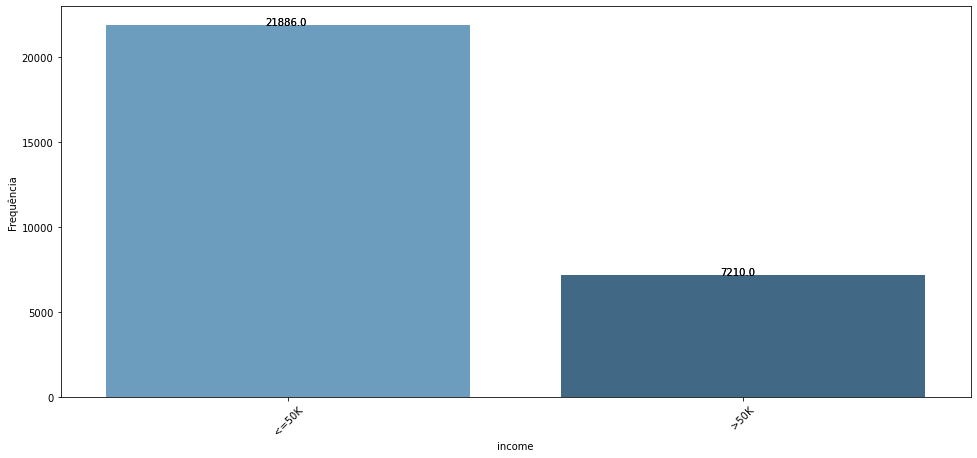

In [25]:
# Análise da frequenciia (histogramas) dos atributos preditores categóricos
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=data[cat_col[i]])
    ax = sns.countplot(x=data[cat_col[i]], data=data, palette="Blues_d")
    plt.subplots_adjust(bottom=0.4)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+2))
    plt.xticks(rotation=45)
    plt.xlabel(cat_col[i])
    plt.ylabel('Frequência')
    plt.tight_layout()

#### Correlação
Check Multicollinearity for Categorical features
- Um teste chi-squared (chi-quadrado ou teste χ2) é uma hipótese estatística.
- O teste chi-square é uma forma de demonstrar a correlação entre duas variáveis categóricas.
- Nesse caso, foi verificado os atributos preditores categóricos com o atributo target

In [26]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in data[cat_col]:
    if chi2_contingency(pd.crosstab(data[target_column], data[feature]))[1] < 0.05:
        chi2_test.append('Rejeita hipótese nula')
    else:
        chi2_test.append('Falha para rejeita a hipótese nula')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Coluna', 'Resultado']
result

Coluna              Resultado
0       workclass  Rejeita hipótese nula
1       education  Rejeita hipótese nula
2  marital-status  Rejeita hipótese nula
3      occupation  Rejeita hipótese nula
4    relationship  Rejeita hipótese nula
5            race  Rejeita hipótese nula
6             sex  Rejeita hipótese nula
7  native-country  Rejeita hipótese nula
8          income  Rejeita hipótese nula

#### Distribuição (em relação ao target)

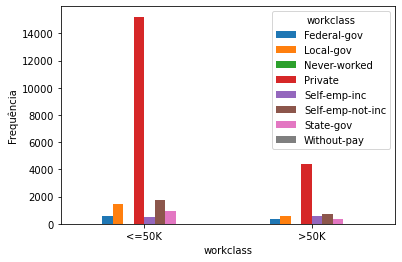

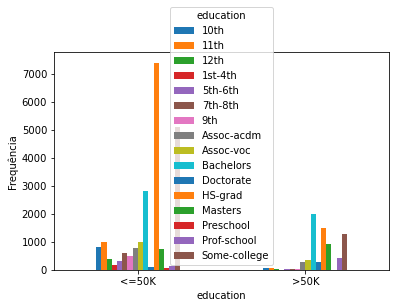

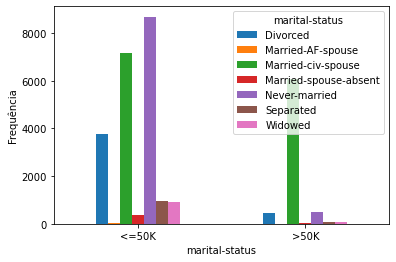

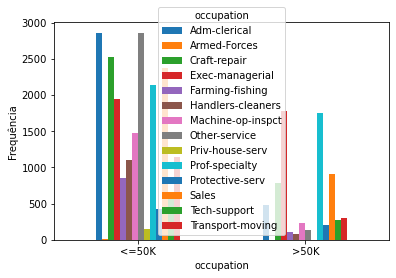

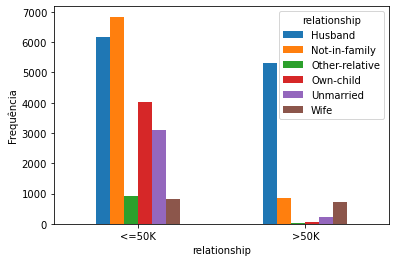

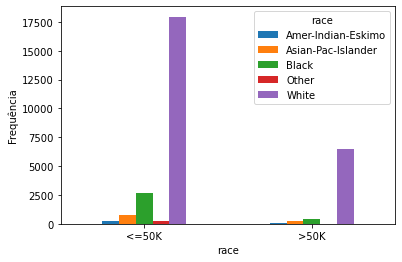

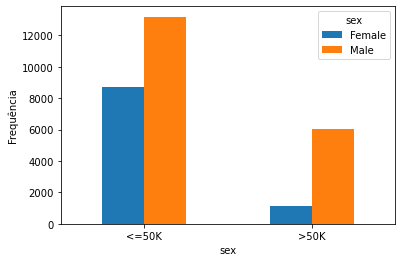

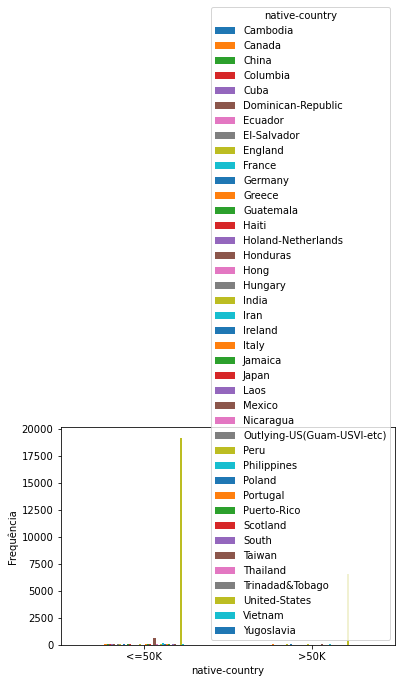

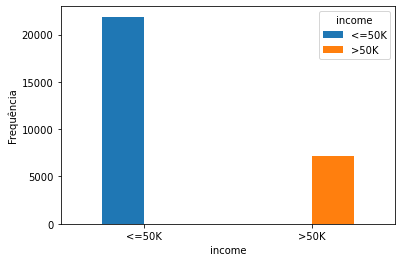

In [38]:
for i in range(0, len(cat_col)):
    class_income = pd.crosstab(data[target_column],data[cat_col[i]])
    class_income.plot(kind='bar')
    #plt.subplots_adjust(bottom=0.4)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+2))
    plt.xticks(rotation=0)
    plt.xlabel(cat_col[i])
    plt.ylabel('Frequência')

In [28]:
print("Percentual da variável target positivas na amostra de treino: {:.2%}".format(np.mean((train_data[target_column] == '>50K').astype(int))))

Percentual da variável target positivas na amostra de treino: 24.78%


**Observações**:

- No atributo race, percebe-se uma grandde quantidade do valor 'White'
- O mesmo vale para o atributo workclass, com grande quantidade de valor 'Private', sendo também os que concentram as maiores receitas.
- Os homens são maioria independente da faixa salarial, embora sua proporção seja maior entre aqueles que ganham acima de 50K. 
- Ainda pior distribuido é o atributo native_country com o valor 'United-States'. Isso posto esse atributo é candidato a ser excluído da análise, reestruturado ou servir de base para um novo atributo, quando das rotinas de _feature engineering_, para o tipo binário, algo como fromUS cujo valor será 1 se valor igual a 'United-States' ou 0 caso contrário.
- Em suma, os maiores salários estão entre aqueles dedicados à iniciativa privada, com maior grau de instrução (Graduatos, Doutores e mestres, embora tenhamos uma parcela significativa que apenas concluiram o ensino fundamental). Também estão nessa categoria os homens casados, brancos e oriundos dos EUA.
- Por fim, percebe-se que o atributo target está desbalanceado.

### Análise dos atributos numéricos

#### Frequencia
**Análise da distribuição (histogramas) dos atributos numéricos**

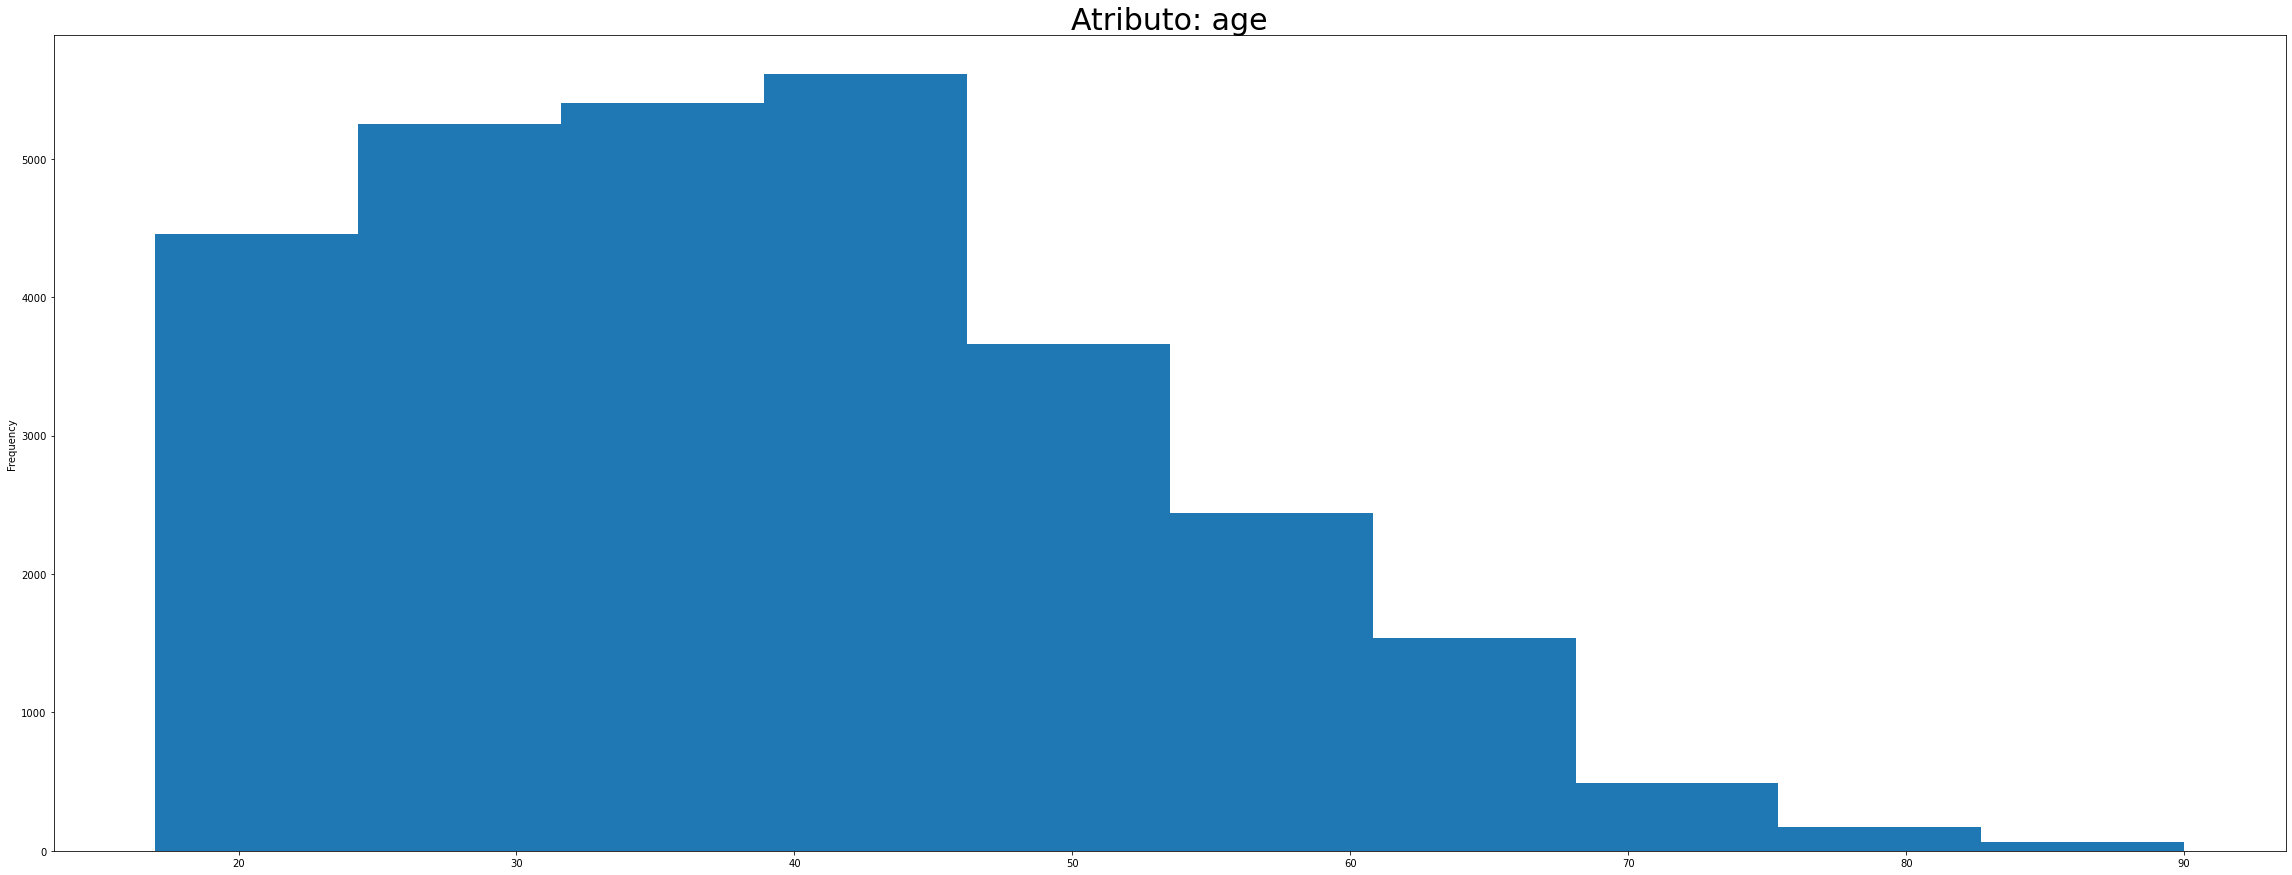

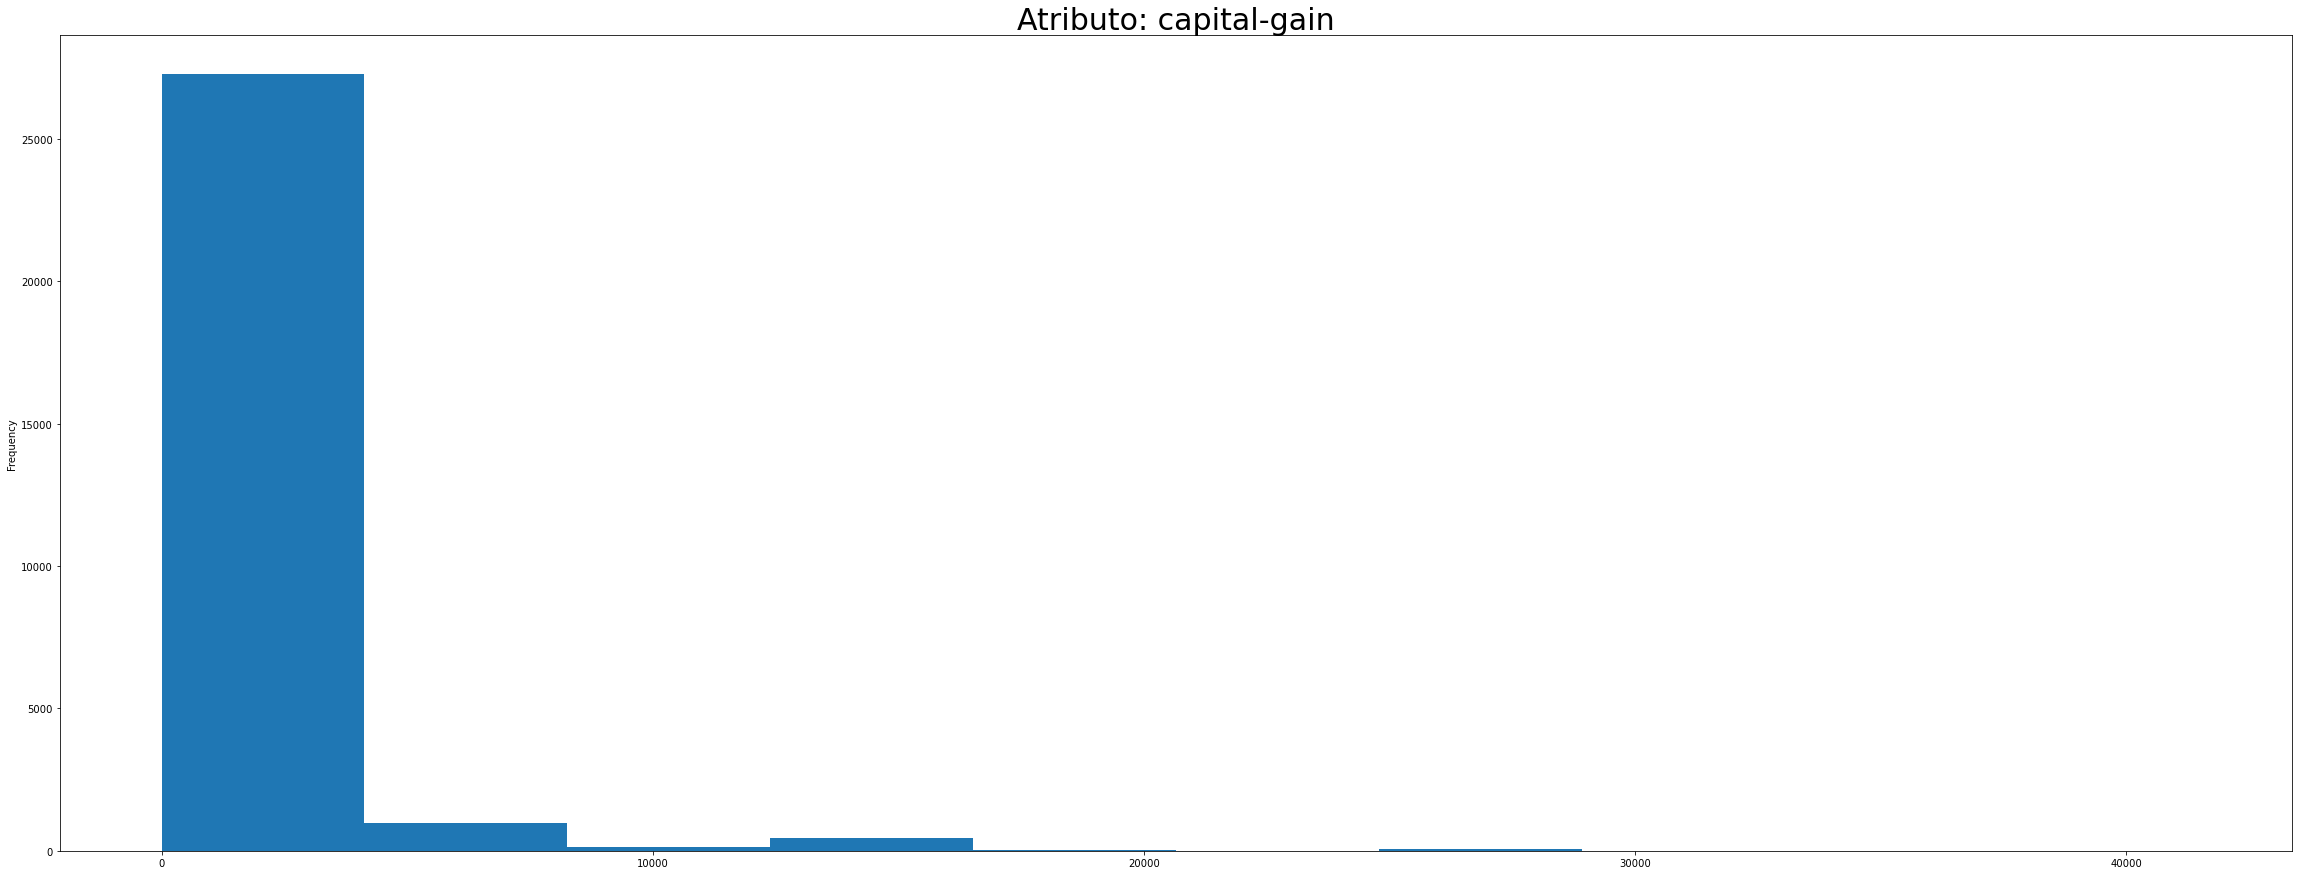

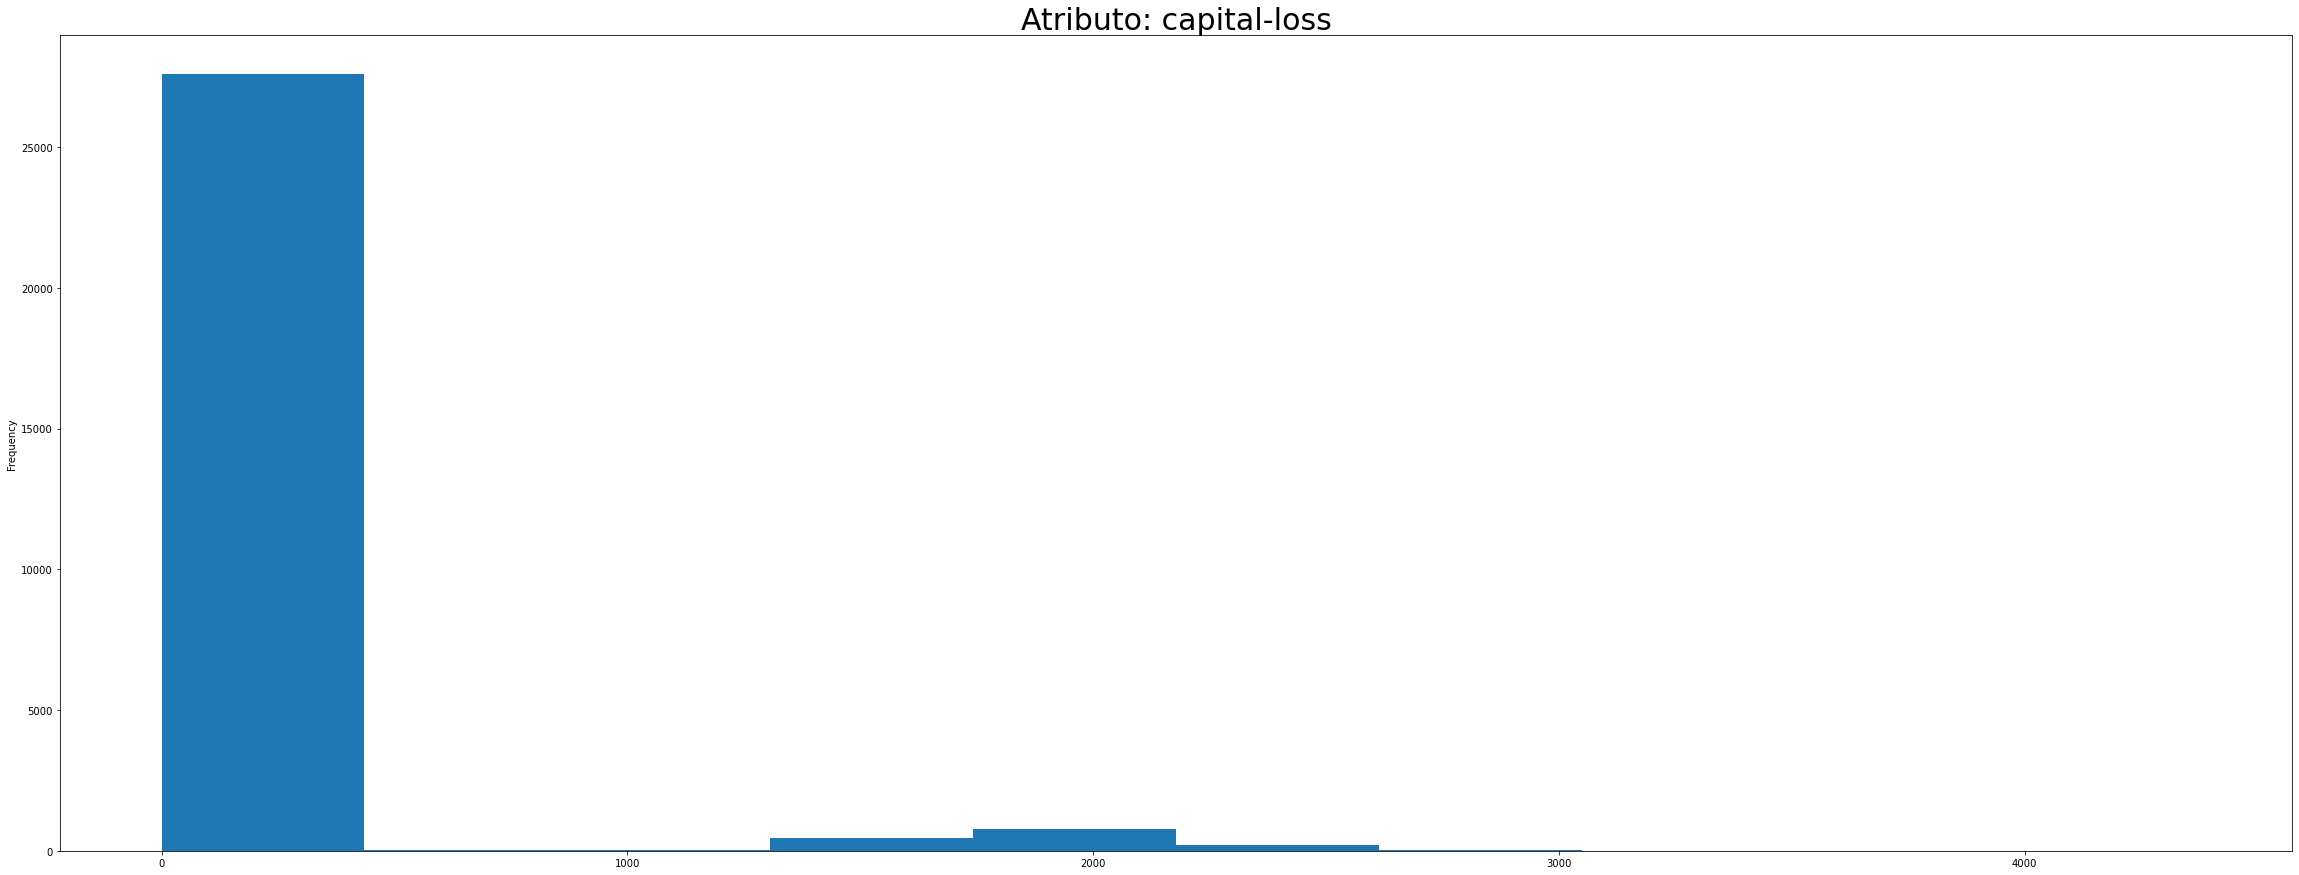

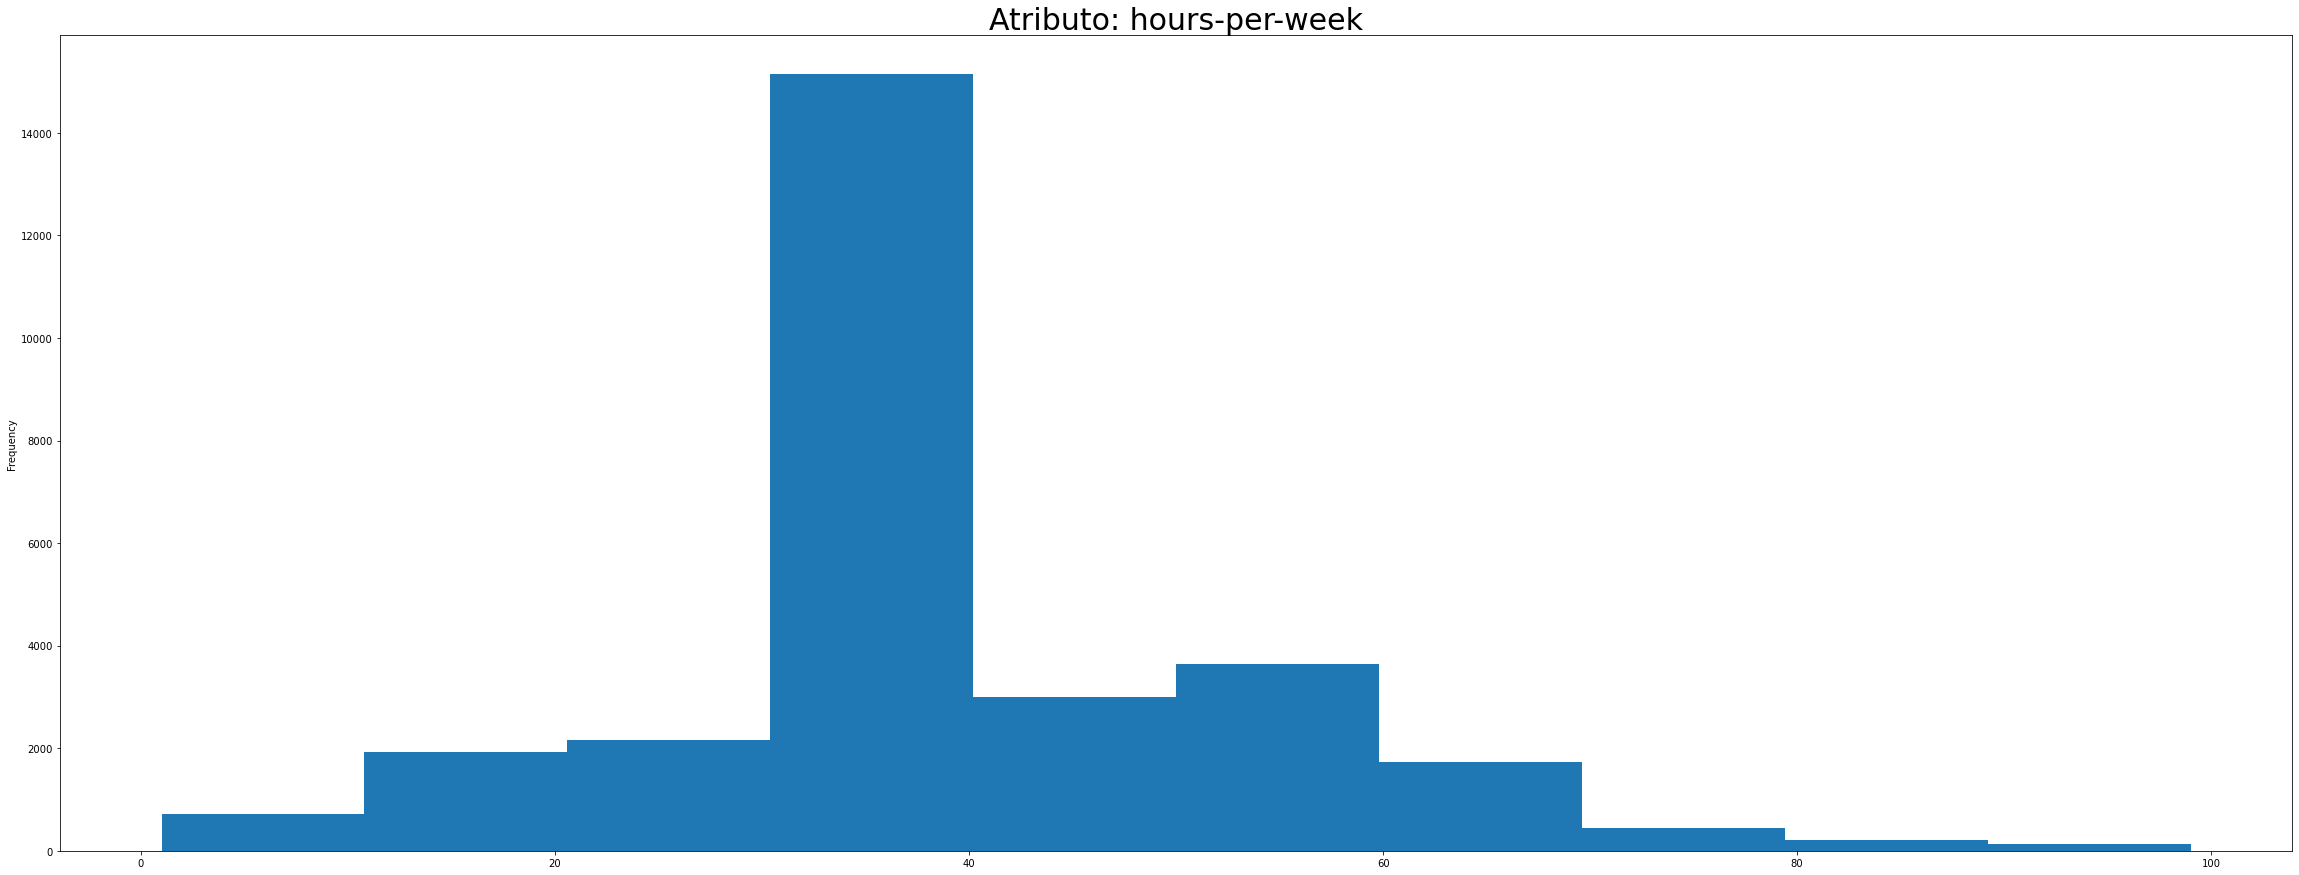

In [29]:
for colname, column_series in data._get_numeric_data().iteritems():
    plt.figure(figsize=(40, 15))
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+2))
    plt.title('Atributo: ' + colname,fontsize = 30)
    column_series.plot(kind='hist')
    plt.show()

#### Correlação

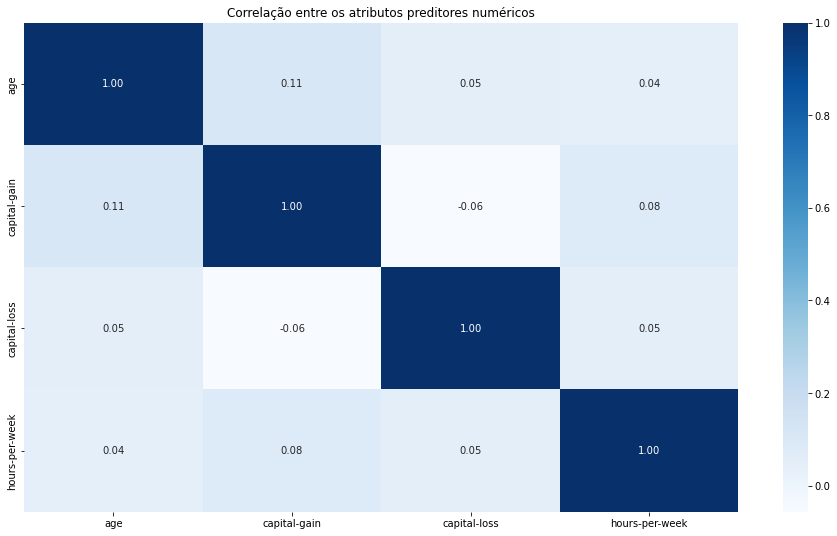

In [30]:
plt.figure(figsize=(16, 9))
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre os atributos preditores numéricos')
plt.show()

#### Distribuição (em relação ao target)

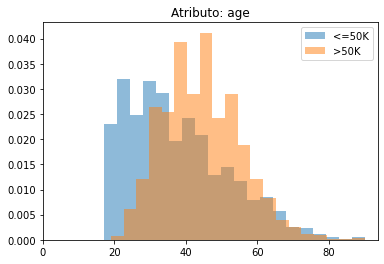

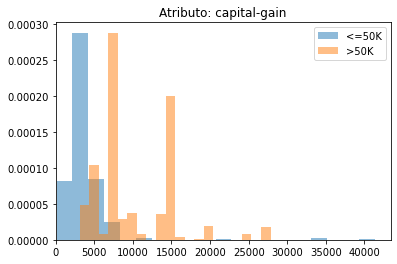

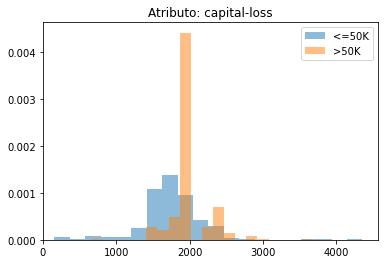

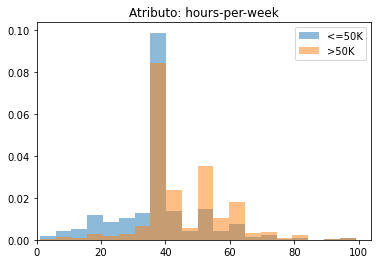

In [31]:
for colname in data._get_numeric_data().columns:
    df = data
    
    if colname in ('capital-gain', 'capital-loss'):
        # como essas colunas possuem muita concentração do valor zero, como aqui o objetivo é
        # analisar sua distribuição, desconsiderei esses valores para evitar um gráfico enviesado (skew)
        df = df[(data[colname] != 0) & ~data[colname].isnull()]
        
    low_income = df.loc[df[target_column] == '<=50K', colname]
    high_income = df.loc[df[target_column] == '>50K', colname]
    
    plt.title('Atributo: ' + colname)
    plt.hist(low_income, label='<=50K', bins=20, density=True, alpha=0.5)
    plt.hist(high_income, label='>50K', bins=20, density=True, alpha=0.5)
    
    xmin, xmax = plt.xlim()
    plt.legend(['<=50K', '>50K'])
    plt.xlim(0, xmax)
    plt.show()

**Observações**:

- No atributo hours_per_week, tem-se grande concentração no valor 40, o que faz sentido, visto que essa é a carga horária semanal padrão da maioria das pessoas.
- Os atributos capital-gain	e capital-loss, possuem grande concentração do valor zero. O que também é o padrão para maioria das pessoas, que não recebem proventos adicionais, tais como bonus ou participação nos lucros e dividendos das empresas. Analisando o profiling dos dados, percebe-se que o valor zero concentra 90 e 94% dos valores possíveis dessas variáveis. Isso torna esses atributos candidatos a exclusão.

_da análise de correlação:_
- Dentre os atributos preditores numéricos, não há grande correlação.

_da análise de distribuição em relação ao atributo target_
- Quanto mais velho maior a probabilidade de maiores receitas
- Quanto maior a formação também maior a probabilidade de maiores receitas
- E por fim, quanto mais uma pessoa trabalha (dedicação em horas) mais ela ganha.

 
 - Dados desbalanceados quanto a variável target com 7841 registros acima de 50k (24% do total) e 24720 abaixo.



### Registros impossíveis de classificar

Alguns registros, talvez por erro na coleta dos dados, possuem a variável target diferente sendo que o valor de todos os atributos 
preditores são iguais, o que é claramente uma inconsistência nociva aos métodos classificadores e portanto devem ser **removidos** antes do treino 

In [32]:
all_columns = data.columns.tolist()
predictor_columns = list(set(all_columns).difference([target_column]))
column_frequency = (data
    .groupby(predictor_columns, as_index=False)
    .agg({target_column: 'nunique'}))

column_frequency[column_frequency.income > 1].shape[0]

590

In [33]:
#exemplo de um dos 590 registros de treino impossível de classificar
impossible = data[(data['sex']=='Female') & (data['education']=='Assoc-acdm') & (data['workclass']=='Private') \
         & (data['capital-gain']==0.0) & (data['marital-status']=='Divorced') & (data['occupation']=='Exec-managerial') \
         & (data['hours-per-week']==40)& (data['age']==40)& (data['marital-status']=='Divorced') ]
impossible

age workclass   education marital-status       occupation  \
13770   40   Private  Assoc-acdm       Divorced  Exec-managerial   
26957   40   Private  Assoc-acdm       Divorced  Exec-managerial   

        relationship   race     sex  capital-gain  capital-loss  \
13770  Not-in-family  White  Female           0.0             0   
26957  Not-in-family  White  Female           0.0             0   

       hours-per-week native-country income  
13770              40  United-States  <=50K  
26957              40  United-States   >50K

### Considerações finais para implementação do classsificador
- O atributo fnlwgt será removido para implementação da classificação, seja porque sua definição não agrega valor à predição, seja pela análise estatística que provou sua baixa correlação ao atributo target.
- O atributo education-num também será removido pois seu valor já está representado com o atributo education
- O atributo native-country será transformado em um atributo binário chamado fromUS, cujo valor será 1 quando native_country for igual a United-States e 0 caso contrário.
- Os atributos capital-gain e capital-loss, também são candidatos a exclusão pois concentram seu dominio em um único valor (zero)
- Registros duplicados e impossíveis de classificar também devem ser removidos da amostra de treino.
- Deve-se testar pelo menos duas abordagens para tratamento dos registros com NaN e utilizar o de melhor desempenho do classificador.
- O atributo target deve ser tratado e seu valor convertido em 1 ou 0